Saving health_dataset_large.csv to health_dataset_large.csv


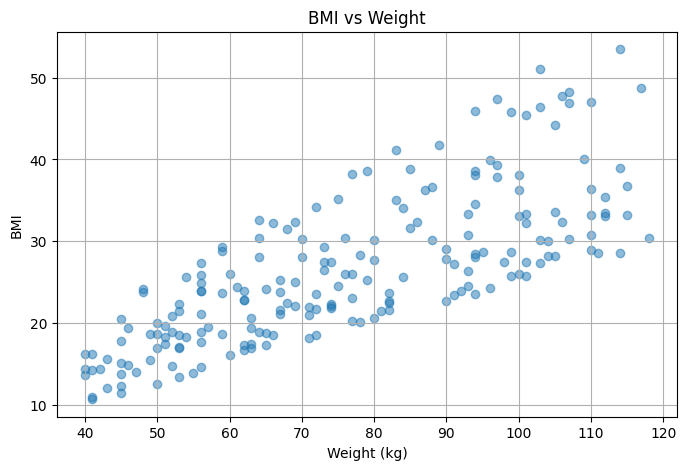

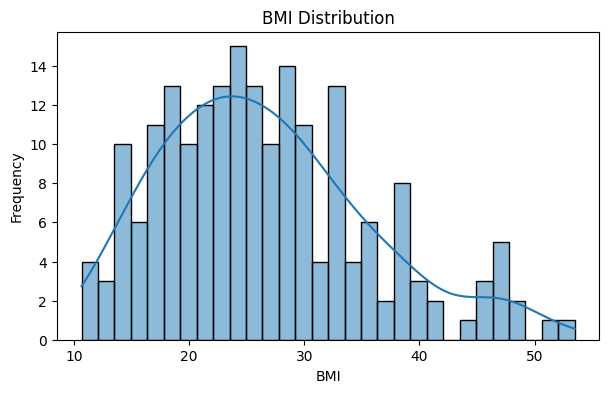

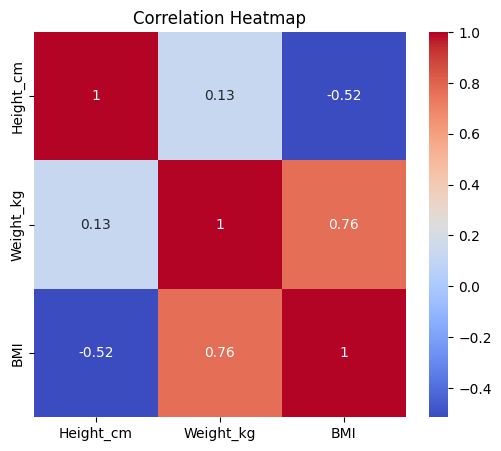

Enter your height in feet (e.g., 5.5): 5.6
Enter your weight in kg: 70

Height: 170.69 cm
Weight: 70.0 kg
Predicted BMI: 24.66
 Category: Normal
Health Percentage: 90%
 Exercise Suggestion: Maintain with balanced exercises (e.g., yoga, walking)
 Ideal Weight Range: 53.9 kg - 72.5 kg


In [ ]:
#  Install required libraries
!pip install seaborn matplotlib

#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#  Upload dataset
from google.colab import files
uploaded = files.upload()

# Read uploaded file
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Preprocessing
data['Category'] = data['Category'].map({
    "Underweight": 0,
    "Normal": 1,
    "Overweight": 2,
    "Obese": 3
})

# Feature & target
X = data[['Height_cm', 'Weight_kg']]
y = data['BMI']

#  EDA - Visualizations

# BMI vs Weight
plt.figure(figsize=(8, 5))
plt.scatter(data['Weight_kg'], data['BMI'], alpha=0.5)
plt.title("BMI vs Weight")
plt.xlabel("Weight (kg)")
plt.ylabel("BMI")
plt.grid(True)
plt.show()

# Histogram of BMI
plt.figure(figsize=(7, 4))
sns.histplot(data['BMI'], bins=30, kde=True)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(data[['Height_cm', 'Weight_kg', 'BMI']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#  Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train Model
lr = LinearRegression()
lr.fit(X_train, y_train)

#  Prediction function
def predict_bmi_and_health(height_ft, weight_kg):
    height_cm = height_ft * 30.48
    input_df = pd.DataFrame([[height_cm, weight_kg]], columns=["Height_cm", "Weight_kg"])
    predicted_bmi = lr.predict(input_df)[0]
    predicted_bmi = round(predicted_bmi, 2)

    height_m = height_cm / 100
    ideal_weight_low = round(18.5 * (height_m ** 2), 1)
    ideal_weight_high = round(24.9 * (height_m ** 2), 1)

    if predicted_bmi < 18.5:
        category = "Underweight"
        health_percent = 60
        exercise = "Weight gain exercises (e.g., strength training)"
    elif 18.5 <= predicted_bmi < 25:
        category = "Normal"
        health_percent = 90
        exercise = "Maintain with balanced exercises (e.g., yoga, walking)"
    elif 25 <= predicted_bmi < 30:
        category = "Overweight"
        health_percent = 70
        exercise = "Weight loss exercises (e.g., cardio, HIIT)"
    else:
        category = "Obese"
        health_percent = 50
        exercise = "Weight loss exercises (e.g., cardio, HIIT)"

    return {
        "height_cm": round(height_cm, 2),
        "predicted_bmi": predicted_bmi,
        "category": category,
        "health_percent": health_percent,
        "exercise": exercise,
        "ideal_weight_range": (ideal_weight_low, ideal_weight_high)
    }

# Take input from user
try:
    height_ft = float(input("Enter your height in feet (e.g., 5.5): "))
    weight_kg = float(input("Enter your weight in kg: "))
    result = predict_bmi_and_health(height_ft, weight_kg)

    print(f"\nHeight: {result['height_cm']} cm")
    print(f"Weight: {weight_kg} kg")
    print(f"Predicted BMI: {result['predicted_bmi']}")
    print(f" Category: {result['category']}")
    print(f"Health Percentage: {result['health_percent']}%")
    print(f" Exercise Suggestion: {result['exercise']}")
    print(f" Ideal Weight Range: {result['ideal_weight_range'][0]} kg - {result['ideal_weight_range'][1]} kg")

except ValueError:
    print(" Please enter valid numeric values.")
